# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

cityweather = []
country = []
date = []
lat = []
lng = []
temp = []
windspeed = []
cloudiness = []
humidity = [] 
id_city = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        id_city.append(response['id'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cityweather.append(city)
        print(f"The city being processed is: {city} | {response['id']}")
    except:
        pass



The city being processed is: ushuaia | 3833367
The city being processed is: forio | 3176748
The city being processed is: mianyang | 1800627
The city being processed is: punta arenas | 3874787
The city being processed is: hilo | 5855927
The city being processed is: itarema | 3393692
The city being processed is: nikki | 2392505
The city being processed is: barrow | 5880054
The city being processed is: kaeo | 2189343
The city being processed is: faanui | 4034551
The city being processed is: vaini | 4032243
The city being processed is: upernavik | 3418910
The city being processed is: rikitea | 4030556
The city being processed is: bethel | 5282297
The city being processed is: albany | 5106841
The city being processed is: georgetown | 1735106
The city being processed is: tahta | 347634
The city being processed is: thompson | 6165406
The city being processed is: kapaa | 5848280
The city being processed is: kalmunai | 1242110
The city being processed is: mahebourg | 934322
The city being proce

The city being processed is: mayumba | 2399001
The city being processed is: esperanza | 3505855
The city being processed is: westport | 4845585
The city being processed is: den helder | 2757220
The city being processed is: saint-joseph | 6690296
The city being processed is: marienburg | 3092472
The city being processed is: ulladulla | 2145554
The city being processed is: huarmey | 3939168
The city being processed is: airai | 1651810
The city being processed is: nikolskoye | 546105
The city being processed is: olinda | 3393536
The city being processed is: kartaly | 1504317
The city being processed is: enna | 2524819
The city being processed is: verkhnevilyuysk | 2013639
The city being processed is: lincoln | 5072006
The city being processed is: tautira | 4033557
The city being processed is: qaanaaq | 3831208
The city being processed is: waipawa | 2206874
The city being processed is: mercedes | 3430708
The city being processed is: svetlaya | 2015852
The city being processed is: dickinson

The city being processed is: codo | 3402000
The city being processed is: natal | 3394023
The city being processed is: bajram curri | 781171
The city being processed is: nyurba | 2018735
The city being processed is: nadvoitsy | 523662
The city being processed is: shelburne | 6145890
The city being processed is: bafra | 751335
The city being processed is: kasungu | 928534
The city being processed is: kieta | 2094027
The city being processed is: grenaa | 2621230
The city being processed is: springfield | 4409896
The city being processed is: izazi | 158825
The city being processed is: alofi | 4036284
The city being processed is: lima | 3936456
The city being processed is: alice springs | 2077895
The city being processed is: yaan | 2338660
The city being processed is: sao filipe | 3374210
The city being processed is: mackenzie | 6063191
The city being processed is: nieuw amsterdam | 3383434
The city being processed is: xiaoweizhai | 1789945
The city being processed is: saint-denis | 2980915

The city being processed is: kushiro | 2129376
The city being processed is: barguzin | 2027109
The city being processed is: richards bay | 962367
The city being processed is: touros | 3386213
The city being processed is: husavik | 2629833
The city being processed is: berdigestyakh | 2026861
The city being processed is: sapa | 1687343
The city being processed is: qaqortoq | 3420846
The city being processed is: oriximina | 3393471
The city being processed is: vestmanna | 2610343
The city being processed is: tema | 2294700
The city being processed is: coihaique | 3894426
The city being processed is: alto parana | 3472440
The city being processed is: itacarambi | 3460942
The city being processed is: dongsheng | 1812256
The city being processed is: chapais | 5919850
The city being processed is: liwan | 1691594
The city being processed is: killybegs | 2963295
The city being processed is: emba | 609924
The city being processed is: awbari | 2219235
The city being processed is: verkhnyaya khava

In [10]:
response = requests.get(query_url + 'London').json()
response['dt']

1581182719

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:

weather_dict = {
    "City": cityweather,
    "Country": country,
    "Date": date,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": windspeed,
    "Cloudiness": cloudiness,
    "Humidity": humidity 
}
weather_data = pd.DataFrame(weather_dict)
weather_data.dtypes

City           object
Country        object
Date            int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
Cloudiness      int64
Humidity        int64
dtype: object

In [40]:
weather_data['Date']=pd.to_datetime(weather_data['Date'], unit = 's')
weather_data.head()

,City,Country,Date,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity
0,ushuaia,AR,2020-02-08 17:27:05,-54.80,-68.30,19.00,2.01,0,45
1,forio,IT,2020-02-08 17:28:42,40.73,13.86,11.11,2.10,0,66
2,mianyang,CN,2020-02-08 17:28:42,31.46,104.75,7.65,0.71,75,66
3,punta arenas,CL,2020-02-08 17:26:16,-53.15,-70.92,22.00,4.60,0,67
4,hilo,US,2020-02-08 17:24:51,19.73,-155.09,16.11,2.60,1,67


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

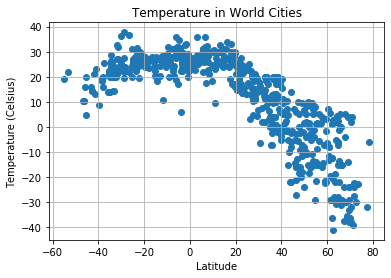

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Temperature in World Cities.png")

#### Latitude vs. Humidity Plot

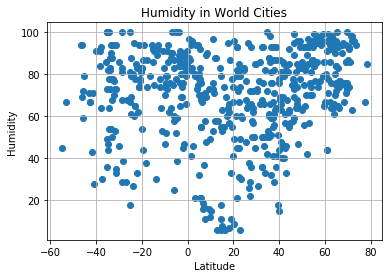

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Humidity in World Cities.png")

#### Latitude vs. Cloudiness Plot

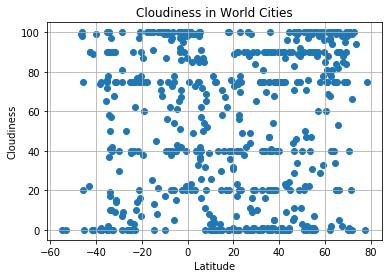

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Cloudiness in World Cities.png")

#### Latitude vs. Wind Speed Plot

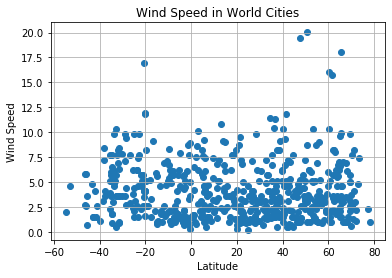

In [16]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Wind Speed in World Cities.png")

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots


In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_data.loc[(weather_data['Lat'] >= 0)]
northern.head()


,City,Country,Date,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity
1,forio,IT,1970-01-01,40.73,13.86,11.11,2.10,0,66
2,mianyang,CN,1970-01-01,31.46,104.75,7.65,0.71,75,66
4,hilo,US,1970-01-01,19.73,-155.09,16.11,2.60,1,67
6,nikki,BJ,1970-01-01,9.94,3.21,29.85,1.93,3,12
7,barrow,US,1970-01-01,71.29,-156.79,-39.00,4.10,20,98


In [19]:
southern = weather_data.loc[(weather_data['Lat'] < 0)]
southern.head()

,City,Country,Date,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity
0,ushuaia,AR,1970-01-01,-54.80,-68.30,19.00,2.01,0,45
3,punta arenas,CL,1970-01-01,-53.15,-70.92,22.00,4.60,0,67
5,itarema,BR,1970-01-01,-2.92,-39.92,29.50,5.04,71,69
8,kaeo,NZ,1970-01-01,-35.10,173.78,13.89,5.66,76,100
9,faanui,PF,1970-01-01,-16.48,-151.75,27.91,9.14,100,79


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8527100911648194


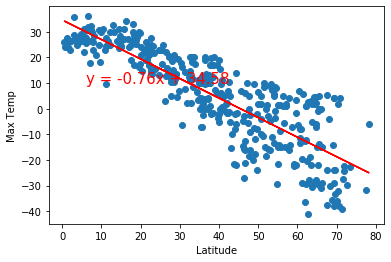

In [20]:
x = northern['Lat']
y = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")

plt.savefig("../Images/temp_lat_linreg_north.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4667093679505574


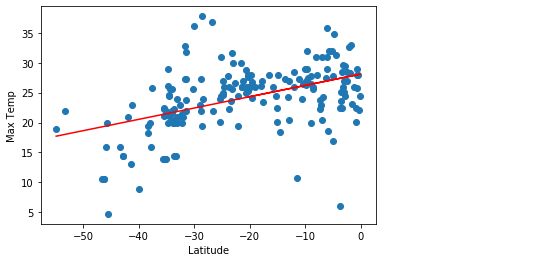

In [21]:
x = southern['Lat']
y = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")

plt.savefig("../Images/temp_lat_linreg_south.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.40464232655522236


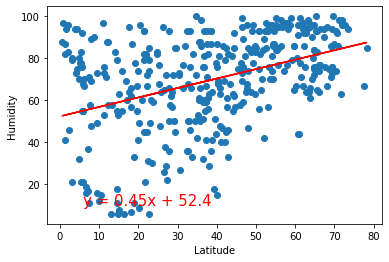

In [22]:
x = northern['Lat']
y = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")

plt.savefig("../Images/humidity_lat_linreg_north.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15065135816469297


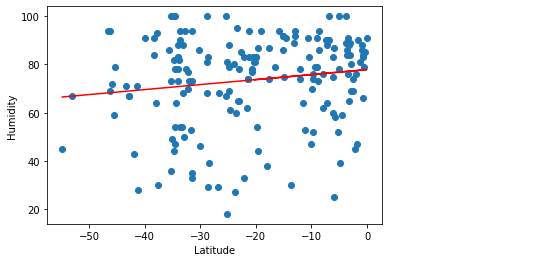

In [23]:
x = southern['Lat']
y = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")

plt.savefig("../Images/humidity_lat_linreg_south.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21438691047060918


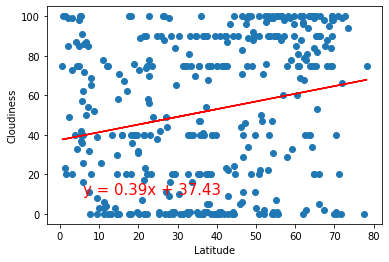

In [24]:
x = northern['Lat']
y = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")

plt.savefig("../Images/cloudiness_lat_linreg_north.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26257270929019016


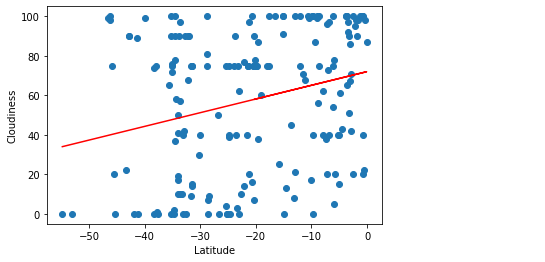

In [25]:
x = southern['Lat']
y = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")

plt.savefig("../Images/cloudiness_lat_linreg_south.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.060399546983078915


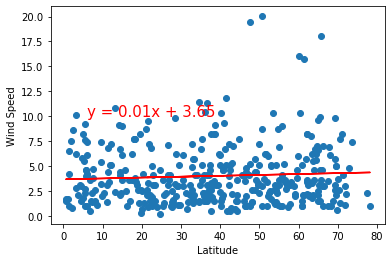

In [26]:
x = northern['Lat']
y = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")

plt.savefig("../Images/windspeed_lat_linreg_north.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14766375305600196


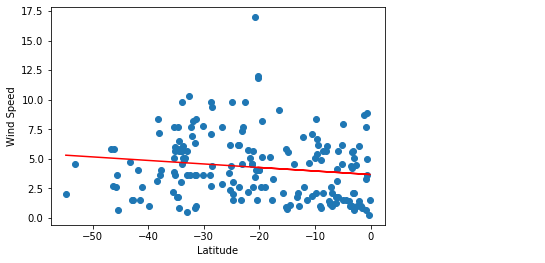

In [27]:
x = southern['Lat']
y = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")

plt.savefig("../Images/windspeed_lat_linreg_south.png")
plt.show()


In [41]:
weather_data.to_csv('my_weather_data.csv')

Observations:

    1. The latitude and the temperature have a correlation between each-other. As much far away from equador
        we go as much the temerature goes down in both direction. More simple, as we go in the both pole direction,
        there will be colder.
    2. There is no correlation between latitude and humidity
    3. There is no correlation between latitude and wind speed